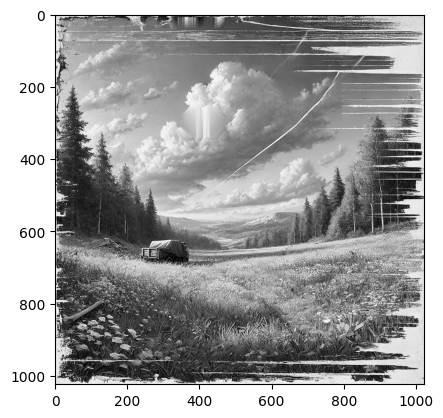

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, restoration, color
from scipy.interpolate import griddata

# Load the image
image = io.imread("Image_Reconstruction_Exercise.png")
image_gray = color.rgb2gray(image)

# Create a mask for the damaged areas
mask = np.zeros(image_gray.shape)
mask[10:40, 320:470] = 1
mask[260:340, 350:470] = 1

# Get the coordinates of the known and missing pixels
known_coords = np.array(np.nonzero(mask == 0)).T
missing_coords = np.array(np.nonzero(mask == 1)).T

# Get the values of the known pixels
known_values = image_gray[mask == 0]

# Perform interpolation
reconstructed_values = griddata(known_coords, known_values, missing_coords, method='linear')

# Create the reconstructed image
reconstructed_image = image_gray.copy()
reconstructed_image[mask == 1] = reconstructed_values
plt.imshow(reconstructed_image, cmap='gray')


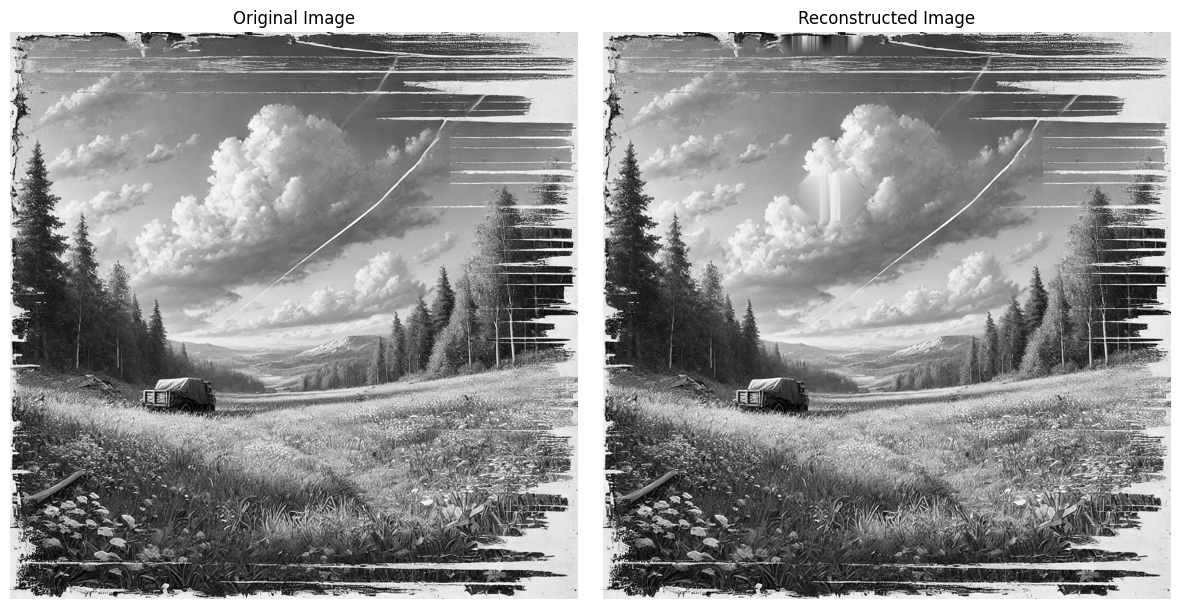

In [8]:
# Display the original and reconstructed images
def plot_comparison(original, modified, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax = axes.ravel()
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(modified, cmap='gray')
    ax[1].set_title(title)
    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.show()

plot_comparison(image_gray, reconstructed_image, 'Reconstructed Image')

## Explanation
#### Key Challenges in Image Reconstruction:
1. *Identifying Damaged Areas:* Accurately identifying the regions that need reconstruction.
2. *Maintaining Image Quality:* Ensuring the reconstructed areas blend seamlessly with the rest of the image.
3. Computational Complexity: Efficiently processing large images.
#### Interpolation and Inpainting:
1. *Interpolation:* Estimates missing pixel values based on surrounding pixels, useful for small missing areas.
2. *Inpainting:*  More advanced, uses surrounding pixel information to fill in larger missing areas, preserving texture and structure.

In [21]:
from sklearn.decomposition import PCA
from skimage.color import rgb2gray

# Load and convert the image to grayscale
image = rgb2gray(io.imread("PCA-Exercise.jpg"))

# Reshape the image into a 1D array
image_reshaped = image.reshape(-1, image.shape[1])

# Normalize pixel values to the range [0, 1]
image_normalized = image_reshaped / 255.0

# Perform PCA
pca = PCA(n_components=50)
image_pca = pca.fit_transform(image_normalized)

# Reconstruct the image from principal components
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = (image_reconstructed * 255).astype(np.uint8)
image_reconstructed = image_reconstructed.reshape(image.shape)


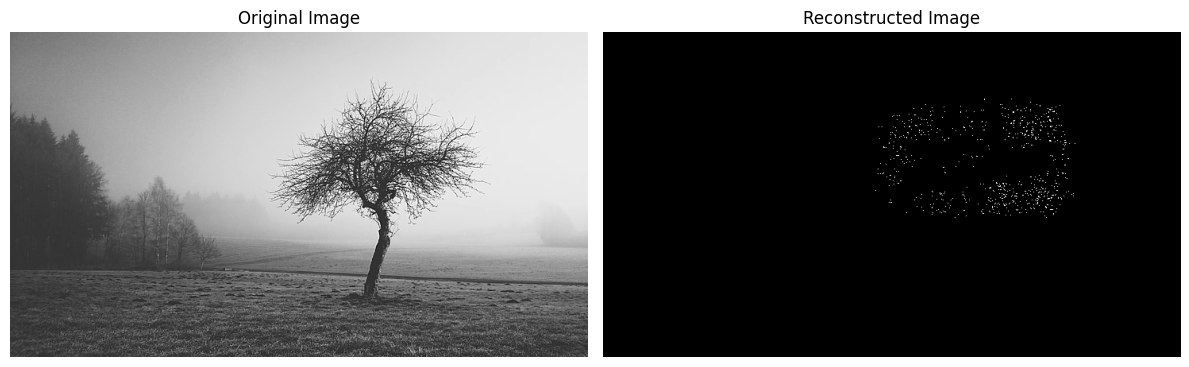

In [22]:
# Display the original and reconstructed images
plot_comparison(image, image_reconstructed, 'Reconstructed Image')

### Explanation
###### Effect of Reducing Principal Components:
1. Quality Degradation: Fewer components result in loss of detail and blurriness.
2. Compression Efficiency: More components retain more detail but reduce compression efficiency.

In [25]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# Apply 2D FFT
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)

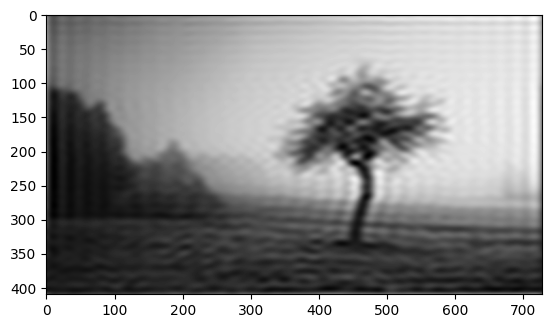

In [27]:
# Create a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
low_pass_filter = np.zeros((rows, cols))
low_pass_filter[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply the low-pass filter
image_low_pass = image_fft_shifted * low_pass_filter
image_low_pass = ifftshift(image_low_pass)
image_low_pass = np.abs(ifft2(image_low_pass))
plt.imshow(image_low_pass, cmap='gray')

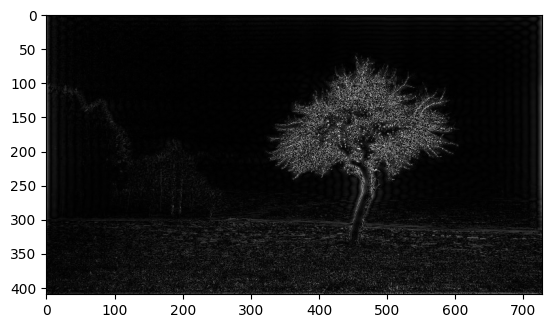

In [29]:
# Create a high-pass filter
high_pass_filter = 1 - low_pass_filter

# Apply the high-pass filter
image_high_pass = image_fft_shifted * high_pass_filter
image_high_pass = ifftshift(image_high_pass)
image_high_pass = np.abs(ifft2(image_high_pass))
plt.imshow(image_high_pass, cmap='gray')

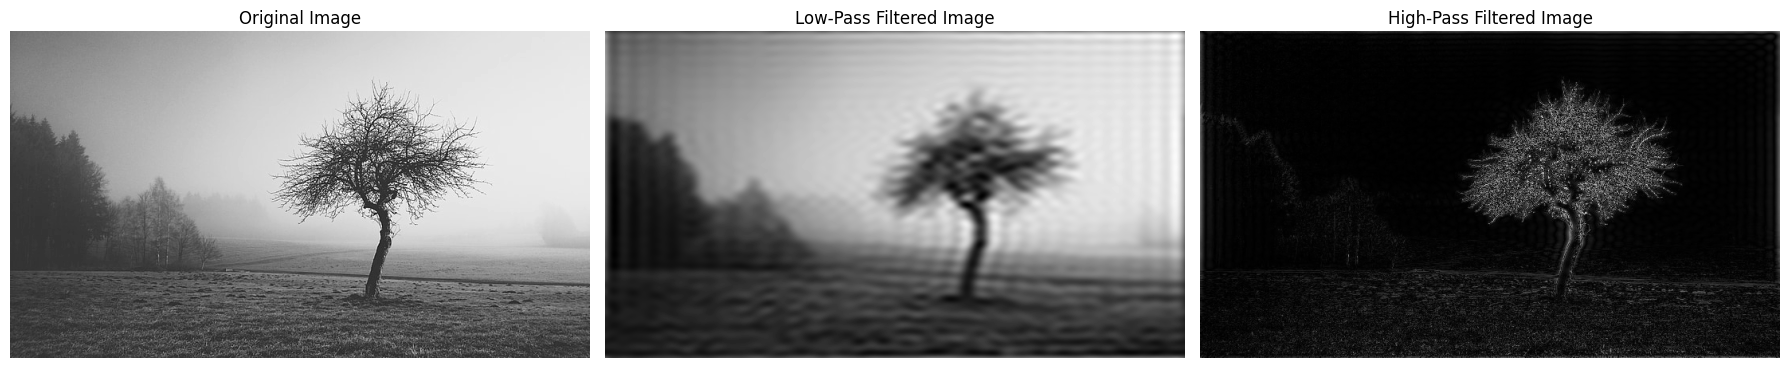

In [30]:
# Display the original, low-pass, and high-pass filtered images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(image_low_pass, cmap='gray')
ax[1].set_title("Low-Pass Filtered Image")
ax[2].imshow(image_high_pass, cmap='gray')
ax[2].set_title("High-Pass Filtered Image")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

### Explanation
##### Significance of Frequency Components:
1.  Low-Frequency Components: Represent smooth areas and overall structure.
2. High-Frequency Components: Represent edges and fine details.
3. Impact on Filtered Results: Low-pass filtering smooths the image, removing noise, while high-pass filtering enhances edges and details.